# Reinforcement Learning RL

In [1]:
# This script implements a simple Q-learning agent in a grid world environment.
# The agent learns to navigate to a goal state while avoiding penalties for each step taken.
# Import necessary libraries
import numpy as np

# Step 1: Define the Environment
class GridWorld:
    def __init__(self, size=4):
        self.size = size
        self.state = (0, 0)
        self.goal = (size - 1, size - 1)
    
    def reset(self):
        self.state = (0, 0)
        return self.state
    
    def step(self, action):
        x, y = self.state
        if action == 0: x = max(0, x - 1)      # up
        elif action == 1: x = min(self.size - 1, x + 1)  # down
        elif action == 2: y = max(0, y - 1)      # left
        elif action == 3: y = min(self.size - 1, y + 1)  # right
        
        self.state = (x, y)
        
        reward = 1.0 if self.state == self.goal else -0.01
        done = self.state == self.goal
        
        return self.state, reward, done

# Step 2: Encode States and Q-Table
state_space = 4 * 4
action_space = 4  # up, down, left, right
Q = np.zeros((state_space, action_space))
def state_to_index(state):
    x, y = state
    return x * 4 + y


# Step 3: Train with Q-Learning
env = GridWorld()
alpha = 0.1      # Learning rate
gamma = 0.99     # Discount factor
epsilon = 0.1    # Exploration factor
episodes = 1000
for ep in range(episodes):
    state = env.reset()
    done = False

    while not done:
        idx = state_to_index(state)
        if np.random.rand() < epsilon:
            action = np.random.choice(action_space)
        else:
            action = np.argmax(Q[idx])
        
        next_state, reward, done = env.step(action)
        next_idx = state_to_index(next_state)
        
        Q[idx, action] = Q[idx, action] + alpha * (reward + gamma * np.max(Q[next_idx]) - Q[idx, action])
        state = next_state

# Step 4: Test the Agent
state = env.reset()
done = False
path = [state]
while not done:
    idx = state_to_index(state)
    action = np.argmax(Q[idx])
    state, _, done = env.step(action)
    path.append(state)
print("Final Path to Goal:")
print(path)

Final Path to Goal:
[(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3)]


• • • • • 
⬜ 🧱 ⬜ 🔥 • 
⬜ 🔥 🧱 ⬜ • 
⬜ 🧱 ⬜ ⬜ • 
⬜ ⬜ ⬜ ⬜ 🧑‍🚀 




/opt/conda/envs/ai-ml-llm-env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129517 (\N{COMPASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


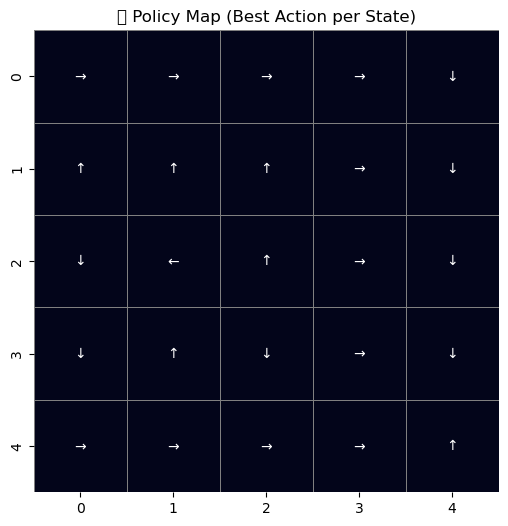

In [2]:
# Updated GridWorld with Obstacles and Visuals
# 🔧 New Features:
# 🧱 Obstacles – The agent can’t pass through these.
# 💢 Penalties – Extra penalty for hitting obstacles or stepping into “bad” zones.
# 🖼️ Visual Output – Render the grid world using emojis (no GUI needed for now).
import random

class AdvancedGridWorld:
    def __init__(self, size=5, obstacles=None, bad_zones=None):
        self.size = size
        self.start = (0, 0)
        self.goal = (size - 1, size - 1)
        self.obstacles = obstacles or [(1, 1), (2, 2), (3, 1)]
        self.bad_zones = bad_zones or [(1, 3), (2, 1)]
        self.state = self.start

    def reset(self):
        self.state = self.start
        return self.state

    def is_valid(self, pos):
        x, y = pos
        return (0 <= x < self.size) and (0 <= y < self.size) and (pos not in self.obstacles)

    def step(self, action):
        x, y = self.state
        if action == 0: new_pos = (x - 1, y)  # up
        elif action == 1: new_pos = (x + 1, y)  # down
        elif action == 2: new_pos = (x, y - 1)  # left
        elif action == 3: new_pos = (x, y + 1)  # right

        if self.is_valid(new_pos):
            self.state = new_pos
        # If invalid (wall or obstacle), state doesn't change

        reward = -0.01  # Step penalty
        if self.state in self.bad_zones:
            reward -= 0.5  # Bad zone penalty
        if self.state == self.goal:
            reward = 1.0

        done = self.state == self.goal
        return self.state, reward, done

    def render(self, path=[]):
        for i in range(self.size):
            row = ''
            for j in range(self.size):
                cell = (i, j)
                if cell == self.state:
                    row += '🧑‍🚀 '
                elif cell == self.goal:
                    row += '🏁 '
                elif cell in self.obstacles:
                    row += '🧱 '
                elif cell in self.bad_zones:
                    row += '🔥 '
                elif cell in path:
                    row += '• '
                else:
                    row += '⬜ '
            print(row)
        print("\n")

env = AdvancedGridWorld()
Q = np.zeros((env.size * env.size, 4))

def state_to_index(state):
    return state[0] * env.size + state[1]

alpha = 0.1
gamma = 0.99
epsilon = 0.2
episodes = 1000

for _ in range(episodes):
    state = env.reset()
    done = False
    while not done:
        idx = state_to_index(state)
        if np.random.rand() < epsilon:
            action = np.random.choice(4)
        else:
            action = np.argmax(Q[idx])

        next_state, reward, done = env.step(action)
        next_idx = state_to_index(next_state)

        Q[idx, action] += alpha * (reward + gamma * np.max(Q[next_idx]) - Q[idx, action])
        state = next_state

state = env.reset()
done = False
path = [state]

while not done:
    idx = state_to_index(state)
    action = np.argmax(Q[idx])
    state, _, done = env.step(action)
    path.append(state)

env.render(path)

# 📌 Key Visual Legend:
# 🧑‍🚀 = Agent
# 🧱 = Obstacle
# 🔥 = Bad Zone (Penalty)
# 🏁 = Goal
# ⬜ = Free cell
# • = Path taken


import matplotlib.pyplot as plt
import seaborn as sns
#  📊 Q-Value Heatmap (Optional Visual Add-On)
# Generate arrow representation for actions
arrow_map = {0: '↑', 1: '↓', 2: '←', 3: '→'}

def q_policy_grid(Q, size):
    grid = np.empty((size, size), dtype=object)
    for i in range(size):
        for j in range(size):
            state_idx = i * size + j
            best_action = np.argmax(Q[state_idx])
            grid[i, j] = arrow_map[best_action]
    return grid

policy_grid = q_policy_grid(Q, env.size)

plt.figure(figsize=(6, 6))
sns.heatmap(np.zeros((env.size, env.size)), 
            annot=policy_grid, fmt='', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("🧭 Policy Map (Best Action per State)")
plt.show()


Episode 0/20000, Epsilon: 0.995
Episode 1000/20000, Epsilon: 0.01
Episode 2000/20000, Epsilon: 0.01
Episode 3000/20000, Epsilon: 0.01
Episode 4000/20000, Epsilon: 0.01
Episode 5000/20000, Epsilon: 0.01
Episode 6000/20000, Epsilon: 0.01
Episode 7000/20000, Epsilon: 0.01
Episode 8000/20000, Epsilon: 0.01
Episode 9000/20000, Epsilon: 0.01
Episode 10000/20000, Epsilon: 0.01
Episode 11000/20000, Epsilon: 0.01
Episode 12000/20000, Epsilon: 0.01
Episode 13000/20000, Epsilon: 0.01
Episode 14000/20000, Epsilon: 0.01
Episode 15000/20000, Epsilon: 0.01
Episode 16000/20000, Epsilon: 0.01
Episode 17000/20000, Epsilon: 0.01
Episode 18000/20000, Epsilon: 0.01
Episode 19000/20000, Epsilon: 0.01
Trained Q-Table:
[[0.94113356 0.95099005 0.92137445 0.9411652 ]
 [0.94007195 0.         0.00225464 0.05205435]
 [0.06887483 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.95080683 0.96059601 0.         0.93952596]
 [0.         0.         0.         0.        ]
 [0.         

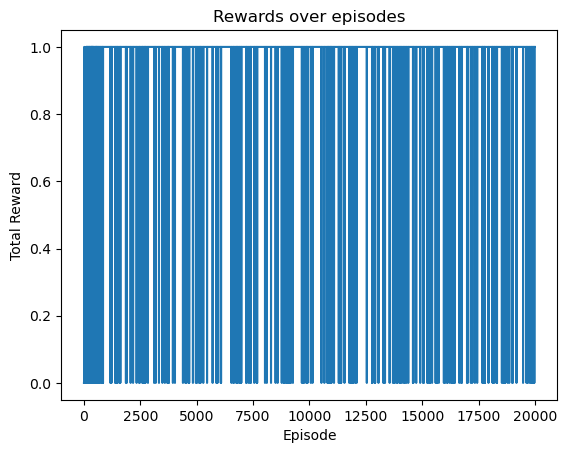

Test Episode 1: Reward = 1.0
Test Episode 2: Reward = 1.0
Test Episode 3: Reward = 1.0
Test Episode 4: Reward = 1.0
Test Episode 5: Reward = 1.0
Test Episode 6: Reward = 1.0
Test Episode 7: Reward = 1.0
Test Episode 8: Reward = 1.0
Test Episode 9: Reward = 1.0
Test Episode 10: Reward = 1.0
Average Test Reward: 1.0


In [3]:
# Now, let's integrate with OpenAI Gym for a more standardized environment.
# This will allow us to use pre-defined environments and leverage Gym's features.
import gym
import matplotlib.pyplot as plt


# Initialize the FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=False)

# Q-Learning Algorithm with epsilon decay and proper settings
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995  # Decay rate for epsilon
min_epsilon = 0.01  # Minimum exploration rate
episodes = 20000  # Number of episodes

# Initialize Q-table with zeros
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Store total rewards for plotting later
rewards = []

for episode in range(episodes):
    state = env.reset()  # No need to index, just get the state
    done = False
    total_reward = 0

    while not done:
        # Exploration vs. Exploitation
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Random action (explore)
        else:
            action = np.argmax(Q[state, :])  # Best action (exploit)

        next_state, reward, done, info = env.step(action)  # Step in the environment

        # Update Q-table
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

        total_reward += reward

        state = next_state  # Move to the next state

    rewards.append(total_reward)
    
    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Optionally, print progress every 1000 episodes
    if episode % 1000 == 0:
        print(f"Episode {episode}/{episodes}, Epsilon: {epsilon}")

# Print the trained Q-table
print("Trained Q-Table:")
print(Q)

plt.plot(rewards)
plt.title('Rewards over episodes')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()


total_rewards = 0
for test_episode in range(10):
    state = env.reset()
    done = False
    episode_reward = 0
    
    while not done:
        action = np.argmax(Q[state, :])  # Exploit learned policy
        next_state, reward, done, info = env.step(action)
        episode_reward += reward
        state = next_state
    
    total_rewards += episode_reward
    print(f"Test Episode {test_episode + 1}: Reward = {episode_reward}")

print(f"Average Test Reward: {total_rewards / 10}")

# Reinforcement Learning Essentials

Reinforcement Learning is a type of Machine Learning where an agent learns to make decisions by interacting with an environment to maximize cumulative rewards.

---

## 🧠 Core Concepts

| Term         | Description |
|--------------|-------------|
| **Agent**    | Learner or decision-maker. |
| **Environment** | Everything the agent interacts with. |
| **State (s)** | Current situation of the agent. |
| **Action (a)** | All possible moves the agent can make. |
| **Reward (r)** | Feedback from the environment (positive or negative). |
| **Policy (π)** | Strategy used to decide actions given states. |
| **Value Function (V(s))** | Expected reward starting from state `s` following policy `π`. |
| **Q-Function (Q(s, a))** | Expected reward starting from state `s`, taking action `a`, and following `π`. |

---

## 🔁 RL Loop

1. Agent observes **state** `s`
2. Chooses **action** `a` based on policy
3. Environment returns **reward** `r` and **next state** `s'`
4. Agent updates its knowledge and continues

## 🔧 Q-Learning Algorithm (Model-Free RL)

**Goal**: Learn the optimal action-value function `Q(s, a)`

### Q-Learning Update Rule:

\[
Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma \cdot \max_a' Q(s', a') - Q(s, a)]
\]

- `α` = Learning rate
- `γ` = Discount factor
- `r` = Immediate reward
- `s'` = Next state

---

### 💡 Exploration vs Exploitation

- **Exploration**: Try new actions to discover rewards.
- **Exploitation**: Use known actions that give highest reward.
- Often controlled using an **ε-greedy policy**:
  - With probability `ε`, choose a random action
  - With probability `1-ε`, choose the best known action

---

## 📚 Key RL Algorithms

| Type              | Examples                          |
|-------------------|-----------------------------------|
| **Value-Based**   | Q-Learning, Deep Q-Networks (DQN) |
| **Policy-Based**  | REINFORCE, PPO                    |
| **Actor-Critic**  | A3C, DDPG                         |

---

## 🎮 Environments for Practice

| Library | Description             |
|--------|--------------------------|
| **Gym** | Standard RL benchmarks (CartPole, MountainCar) |
| **PettingZoo** | Multi-agent RL environments         |
| **Unity ML-Agents** | Game-like 3D RL environments    |

---

## ✅ Sample Applications of RL

- Game Playing (AlphaGo, Dota2 Bots)
- Robotics & Navigation
- Recommender Systems
- Financial Trading Bots

# Exploration vs. Exploitation in Reinforcement Learning

In reinforcement learning, the agent must balance two strategies: **exploration** and **exploitation**. These two strategies are key to learning an optimal policy.

## 1. Exploration
- **Exploration** refers to the agent trying new actions to discover potentially better strategies for achieving its goal.
- The goal of exploration is to allow the agent to gather more information about the environment, especially when it is uncertain about the consequences of its actions.
- Exploration helps the agent avoid local optima by testing actions that may lead to better rewards but are currently unknown.

**Example**: If the agent always chooses the same action based on its current knowledge (e.g., moving right in a grid environment), it might miss a path that leads to a higher reward (e.g., moving left). Exploration would encourage the agent to try that left action, which may turn out to be better in the long term.

### Benefits of Exploration:
- Ensures that the agent does not get stuck in suboptimal actions.
- Helps the agent learn about the environment's state space more thoroughly.
- Useful in unknown or dynamic environments where the optimal strategy is not immediately apparent.

## 2. Exploitation
- **Exploitation** refers to the agent choosing the best-known action based on the current knowledge of the environment (i.e., the current Q-table or learned policy).
- The goal of exploitation is to maximize the immediate reward by selecting actions that have previously yielded the highest payoff.

**Example**: If the agent has learned that moving right always leads to the goal, it will continue exploiting that knowledge by consistently choosing to move right.

### Benefits of Exploitation:
- Maximizes rewards based on the current understanding of the environment.
- Efficient in stable, well-understood environments where the best strategy is known.

## Balancing Exploration and Exploitation
In reinforcement learning, it's crucial to balance exploration and exploitation to ensure that the agent can learn effectively over time. This is typically achieved using the **ε-greedy strategy** or other similar techniques.

### ε-Greedy Strategy:
The **ε-greedy** strategy is a commonly used method that balances exploration and exploitation by introducing randomness into the decision-making process. The agent chooses the best action (exploitation) with a probability of 1 - ε, and it chooses a random action (exploration) with a probability of ε.

**Formula**:
- If `np.random.rand() < ε`: Explore (choose a random action)
- Else: Exploit (choose the action with the highest Q-value)

Where:
- **ε** is the exploration rate (between 0 and 1).
  - High **ε** promotes more exploration (more random actions).
  - Low **ε** promotes more exploitation (sticking to the best-known actions).

### Example:
In the initial stages of training, an agent may set **ε** to a high value (e.g., **ε = 1.0**), allowing for more exploration. As training progresses, **ε** gradually decays to a smaller value (e.g., **ε = 0.1**), encouraging the agent to exploit its learned knowledge.

## Conclusion
- **Exploration** allows the agent to discover new strategies and avoid getting stuck in local minima.
- **Exploitation** leverages the agent's current knowledge to maximize reward.
- A well-balanced exploration-exploitation strategy is critical to the success of a reinforcement learning agent.

```python
epsilon = 1.0  # Initial exploration probability
epsilon_decay = 0.995  # Decay factor for epsilon
min_epsilon = 0.01  # Minimum value for epsilon

# In each episode:
if np.random.rand() < epsilon:
    action = env.action_space.sample()  # Explore by taking a random action
else:
    action = np.argmax(Q[state, :])  # Exploit the best-known action

# Decay epsilon after each episode to reduce exploration over time
epsilon = max(min_epsilon, epsilon * epsilon_decay)
```